### IMPORTS

In [342]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier

### READING CSVs

In [343]:
train_values = pd.read_pickle('../cleaned_train.pkl')  #CLEANED
train_labels = pd.read_csv('../TP1/train_labels.csv')
test_values = pd.read_pickle('../cleaned_test.pkl') #CLEANED

### FEATURE ENGINEERING 

In [344]:
train_values.columns

Index(['building_id', 'damage_grade', 'geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has

In [354]:
selected_features = ['geo_level_1_id', 'geo_level_2_id',
       'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage',
       'height_percentage', 'land_surface_condition', 'foundation_type',
       'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families']

#ONE HOT ENCODING
train_values_subset = train_values[selected_features]
train_values_subset = pd.get_dummies(train_values_subset)

train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,True,True,False,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,True,False,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,False,True,False,...,0,0,0,1,0,0,0,0,1,0
260597,17,715,2060,2,0,6,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
260598,17,51,8163,3,55,6,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
260599,26,39,1851,2,10,14,6,False,False,False,...,0,0,0,0,0,0,0,0,1,0


### TRYING XGBOOST WITH CROSS VALIDATION

In [346]:
X = train_values_subset.to_numpy()
y = train_labels.damage_grade.to_numpy()

In [347]:
xg_class = XGBClassifier(colsample_bytree = 0.5,
                         gamma = 0.9,
                         learning_rate = 0.5,
                         max_depth = 9,
                         min_child_weight = 0,
                         n_estimators = 128)

In [348]:
scores = cross_val_score(xg_class, X, y=y, scoring='f1_micro')

/home/mauricio/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mauricio/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mauricio/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mauricio/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mauricio/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [349]:
scores

array([0.72502446, 0.72079816, 0.72632387, 0.72294705, 0.72476976])

### SIMPLE XGBOOST REGRESSOR WITH TRAIN SPLIT 

In [ ]:
X = train_values_subset.to_numpy();
y = train_labels.damage_grade.to_numpy();
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xg_reg = XGBRegressor(objective='reg:squarederror')

In [ ]:
xg_reg.fit(X_train, y_train)

In [ ]:
prediction = xg_reg.predict(X_test)

In [ ]:
prediction = prediction.astype(int)

In [ ]:
error = f1_score(y_test, prediction, average='micro')
error

### TRYING WITH XGBOOST REGRESSOR WITH GRIDSEARCH 

In [ ]:
param_grid = {'learning_rate': [0,1],
             'max_depth': [2,6],
             'n_estimators': [30,80]}

xg_reg = XGBRegressor(objective='reg:squarederror')
gs = GridSearchCV(xg_reg, param_grid, cv=10)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [18]:
gs

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [19]:
prediction = gs.predict(X_test)
prediction = prediction.astype(int)
prediction

array([2, 1, 1, ..., 2, 2, 1])

In [20]:
error = f1_score(y_test, prediction, average='micro')
error

0.5190230425356382

### NOW USING XGBOOST CLASSIFIER

In [400]:
xg_class = XGBClassifier(colsample_bytree = 0.5,
                         gamma = 0.9,
                         learning_rate = 0.5,
                         max_depth = 9,
                         min_child_weight = 0,
                         n_estimators = 128)
features_test = ['geo_level_1_id', 'geo_level_2_id',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
        'foundation_type_i','foundation_type_r','roof_type_x',
        'ground_floor_type_v']
X = train_values_subset.loc[:,features_test].to_numpy();
y = train_labels.damage_grade.to_numpy();

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [401]:
xg_class.fit(X_train, y_train)

/home/mauricio/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=9,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=128, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [402]:
preds = xg_class.predict(X_test)
preds

array([3, 2, 2, ..., 2, 3, 2])

In [403]:
f1_score(y_test, preds, average='micro')

0.7150476775196178

In [404]:
xg_class.feature_importances_

array([0.17711541, 0.03967998, 0.0793499 , 0.03512323, 0.0737113 ,
       0.02701574, 0.10205304, 0.2298489 , 0.10897418, 0.12712836],
      dtype=float32)

In [405]:
%matplotlib inline
import matplotlib.pyplot as plt

In [410]:
df = pd.DataFrame(columns=train_values_subset.loc[:,features_test].columns)
df = df.T

In [411]:
df['feature importance'] = xg_class.feature_importances_

<AxesSubplot:>

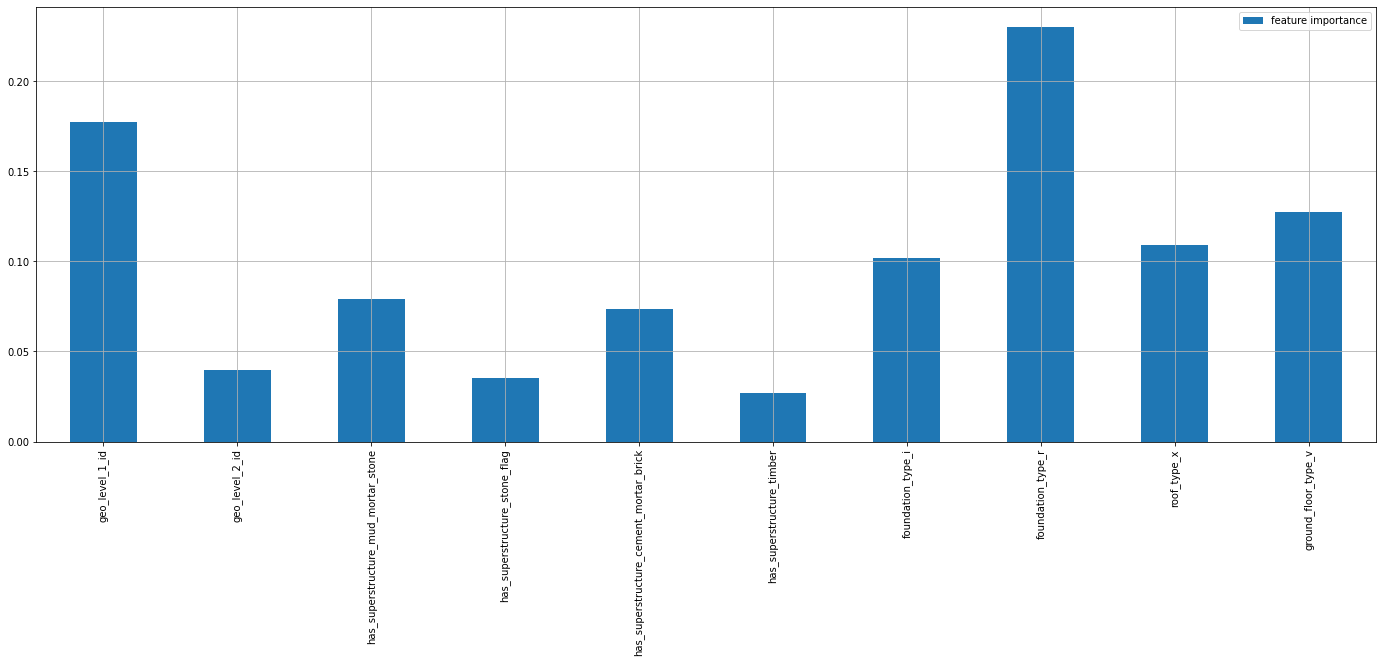

In [412]:
df.plot.bar(figsize = (24,8), grid=True)

### XGBOOST CLASSIFIER WITH GS

In [24]:
xg_class = XGBClassifier()

X = train_values_subset.to_numpy();
y = train_labels.damage_grade.to_numpy();

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
param_grid = {'learning_rate': [0,1],
             'max_depth': [6,10],
             'min_child_weight': [0,3],
             'gamma': [0,1],
             'colsample_bytree': [0,1],
             'n_estimators': [100,135]}

gs = GridSearchCV(xg_class, param_grid, cv=10)

In [ ]:
%%time
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [35]:
preds = gs.predict(X_test)
preds

array([3, 2, 2, ..., 2, 3, 2])

In [36]:
f1_score(y_test, preds, average='micro')

0.7329483317664665

In [ ]:
xg_class.feature_importances_

### PREDICTION

In [365]:
xg_class = XGBClassifier(colsample_bytree = 0.5,
                         gamma = 0.9,
                         learning_rate = 0.5,
                         max_depth = 9,
                         min_child_weight = 0,
                         n_estimators = 128)

X = train_values_subset.to_numpy();
y = train_labels.damage_grade.to_numpy();

In [366]:
xg_class.fit(X, y)

/home/mauricio/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=9,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=128, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [368]:
test_values = test_values.set_index('building_id')
test_values_subset = test_values[selected_features]
test_values_subset = pd.get_dummies(test_values_subset)
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,False,True,False,...,0,0,0,0,0,0,0,0,1,0
99355,6,141,11987,2,25,13,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
890251,22,19,10044,2,5,4,5,False,True,False,...,0,0,0,0,0,0,0,0,1,0
745817,26,39,633,1,0,19,3,False,False,False,...,0,0,0,0,0,0,0,0,1,0
421793,17,289,7970,3,15,8,7,False,True,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,False,True,False,...,0,0,0,0,0,0,0,0,0,1
663567,10,1407,11907,3,25,6,7,True,True,True,...,0,0,0,0,0,0,0,0,1,0
1049160,22,1136,7712,1,50,3,3,False,True,False,...,0,0,0,0,0,0,0,0,1,0


In [369]:
preds = xg_class.predict(test_values_subset)
preds

array([3, 2, 2, ..., 2, 2, 2])

In [370]:
submission_format = pd.read_csv('../TP1/submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=preds, columns=submission_format.columns, index=submission_format.index)
my_submission

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3
...,...
310028,2
663567,2
1049160,2


In [371]:
my_submission.to_csv('Submits/prueba.csv')

In [372]:
xg_class.feature_importances_

array([0.08261296, 0.022981  , 0.01143451, 0.01486632, 0.01176118,
       0.00727201, 0.00734309, 0.01095389, 0.04806926, 0.0160305 ,
       0.01031266, 0.01275862, 0.03122976, 0.01424909, 0.01085051,
       0.00888351, 0.01095251, 0.00997859, 0.00786349, 0.00749034,
       0.00877829, 0.00897679, 0.01228148, 0.03534244, 0.1552296 ,
       0.01035005, 0.0152243 , 0.00905583, 0.01310203, 0.04215221,
       0.01157007, 0.0062413 , 0.13465242, 0.00898033, 0.00721143,
       0.01097571, 0.01690423, 0.00947185, 0.01211405, 0.0067961 ,
       0.00566781, 0.00938492, 0.00750626, 0.00614481, 0.00544041,
       0.00724043, 0.00266775, 0.00337363, 0.0038384 , 0.00445736,
       0.00752872, 0.00438472, 0.00805356, 0.00789753, 0.00640898,
       0.00838913, 0.00831128], dtype=float32)

In [373]:
%matplotlib inline
import matplotlib.pyplot as plt

In [386]:
df = pd.DataFrame(columns=train_values_subset.columns)
df = df.T

In [387]:
df['feature importance'] = xg_class.feature_importances_

<AxesSubplot:>

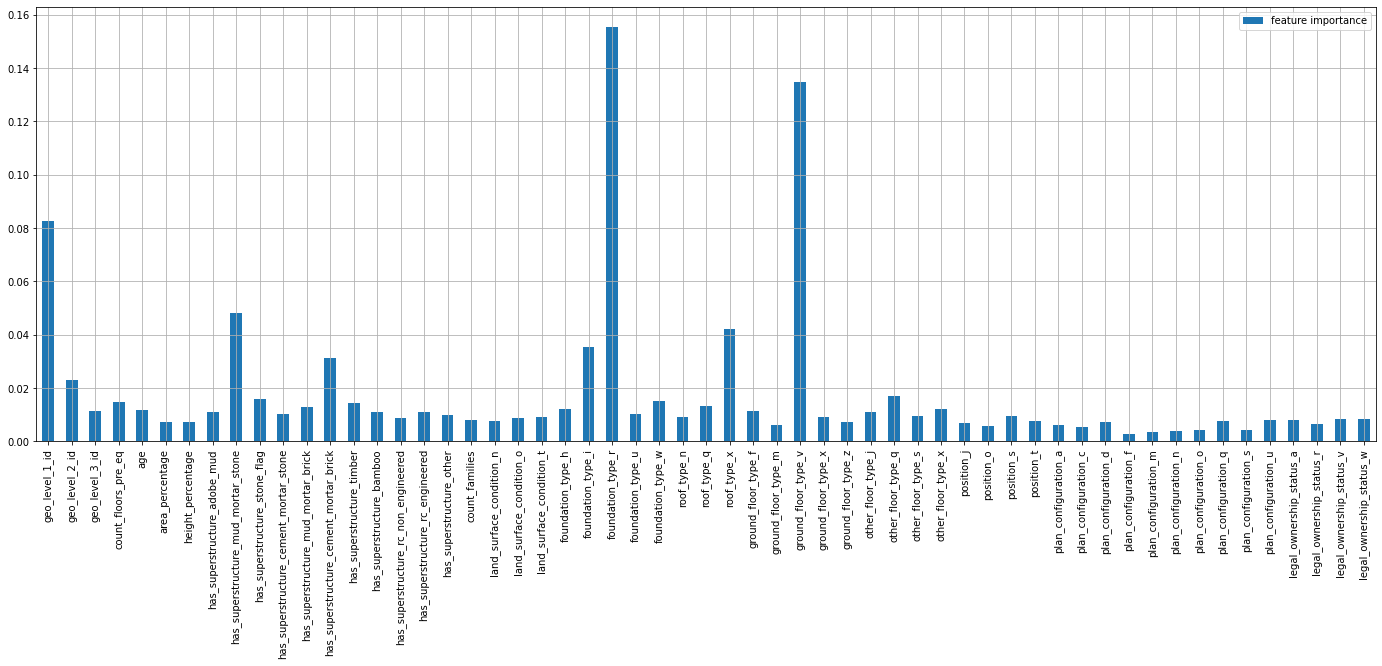

In [394]:
df.plot.bar(figsize = (24,8), grid=True)